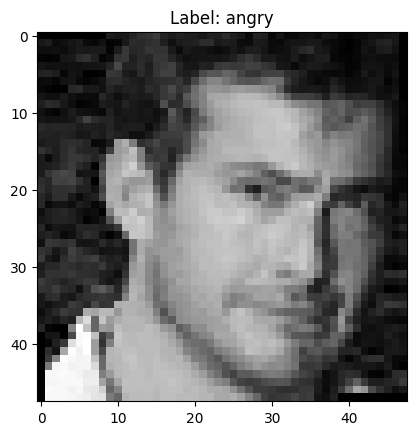

CPU times: total: 6.81 s
Wall time: 1min 26s


In [3]:
%%time
import os
import numpy as np
import cv2
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn.functional as F
from tqdm import tqdm

# Define paths
train_dir = r"C:\Users\pvX\Emotion_Project\My_Project\archive (2)\train"
test_dir = r"C:\Users\pvX\Emotion_Project\My_Project\archive (2)\test"

# Custom Dataset class
class EmotionDataset(Dataset):
    def __init__(self, folder, emotions, transform=None):
        self.images = []  # List to store image data
        self.labels = []  # List to store image labels
        self.emotions = emotions  # Emotion labels passed as an argument
        self.transform = transform  # Transformations to apply to the images
        
        # Loop through each emotion folder
        for emotion in emotions:
            emotion_folder = os.path.join(folder, emotion)  # Path to the emotion folder
            label = emotions.index(emotion)  # Get the label index for the emotion
            
            # Loop through each image file in the emotion folder
            for filename in os.listdir(emotion_folder):
                img_path = os.path.join(emotion_folder, filename)  # Full path to the image file
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read the image in grayscale
                if img is not None:
                    img = cv2.resize(img, (48, 48))  # Resize the image to 48x48 pixels
                    self.images.append(img)  # Add the image to the images list
                    self.labels.append(label)  # Add the label to the labels list

    def __len__(self):
        return len(self.images)  # Return the total number of images

    def __getitem__(self, idx):
        image = self.images[idx]  # Get the image at the given index
        label = self.labels[idx]  # Get the label at the given index
        if self.transform:
            image = self.transform(image)  # Apply transformations to the image
        return image, label  # Return the transformed image and its label

# Define transformations with data augmentation
transform = transforms.Compose([
    transforms.ToPILImage(),  # Convert the image to a PIL Image
    transforms.RandomHorizontalFlip(),  # Randomly flip the image horizontally
    transforms.RandomRotation(10),  # Randomly rotate the image by up to 10 degrees
    transforms.ToTensor(),  # Convert the PIL Image to a Tensor
    transforms.Normalize((0.5,), (0.5,))  # Normalize the image with mean=0.5 and std=0.5
])

# List of emotion labels corresponding to the folders
emotions = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]

# Load datasets with emotions passed as an argument
train_dataset = EmotionDataset(train_dir, emotions, transform=transform)
test_dataset = EmotionDataset(test_dir, emotions, transform=transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)  # Shuffle the training data
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)  # Do not shuffle the testing data

# Display a sample image
sample_image, sample_label = train_dataset[1]  # Get the second image and label from the training dataset
plt.imshow(sample_image.squeeze(), cmap='gray')  # Display the image in grayscale
plt.title(f'Label: {emotions[sample_label]}')  # Set the title to the emotion label
plt.show()  # Show the plot



ShallowCNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=4096, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=7, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)
Using device: cpu


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:33<00:00,  6.63batch/s]


Epoch [1/120], Train Loss: 1.7324, Train Accuracy: 29.55%, Test Loss: 1.5960, Test Accuracy: 39.33%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:32<00:00,  6.98batch/s]


Epoch [2/120], Train Loss: 1.5494, Train Accuracy: 40.07%, Test Loss: 1.4651, Test Accuracy: 44.04%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:32<00:00,  6.82batch/s]


Epoch [3/120], Train Loss: 1.4486, Train Accuracy: 44.34%, Test Loss: 1.3801, Test Accuracy: 47.35%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:32<00:00,  7.00batch/s]


Epoch [4/120], Train Loss: 1.3760, Train Accuracy: 47.48%, Test Loss: 1.3253, Test Accuracy: 49.51%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:33<00:00,  6.70batch/s]


Epoch [5/120], Train Loss: 1.3173, Train Accuracy: 49.79%, Test Loss: 1.2774, Test Accuracy: 50.67%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:36<00:00,  6.24batch/s]


Epoch [6/120], Train Loss: 1.2722, Train Accuracy: 51.76%, Test Loss: 1.2440, Test Accuracy: 52.24%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:33<00:00,  6.72batch/s]


Epoch [7/120], Train Loss: 1.2342, Train Accuracy: 53.17%, Test Loss: 1.2145, Test Accuracy: 53.76%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:34<00:00,  6.59batch/s]


Epoch [8/120], Train Loss: 1.2003, Train Accuracy: 54.88%, Test Loss: 1.1913, Test Accuracy: 54.40%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:32<00:00,  6.87batch/s]


Epoch [9/120], Train Loss: 1.1686, Train Accuracy: 56.11%, Test Loss: 1.1761, Test Accuracy: 55.08%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:35<00:00,  6.29batch/s]


Epoch [10/120], Train Loss: 1.1458, Train Accuracy: 57.18%, Test Loss: 1.1533, Test Accuracy: 57.12%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:35<00:00,  6.41batch/s]


Epoch [11/120], Train Loss: 1.1226, Train Accuracy: 57.21%, Test Loss: 1.1517, Test Accuracy: 55.88%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:35<00:00,  6.29batch/s]


Epoch [12/120], Train Loss: 1.0997, Train Accuracy: 58.85%, Test Loss: 1.1484, Test Accuracy: 56.45%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:34<00:00,  6.50batch/s]


Epoch [13/120], Train Loss: 1.0775, Train Accuracy: 59.29%, Test Loss: 1.1230, Test Accuracy: 57.29%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:32<00:00,  6.97batch/s]


Epoch [14/120], Train Loss: 1.0595, Train Accuracy: 60.21%, Test Loss: 1.1073, Test Accuracy: 58.41%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:29<00:00,  7.52batch/s]


Epoch [15/120], Train Loss: 1.0410, Train Accuracy: 61.05%, Test Loss: 1.1206, Test Accuracy: 58.36%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:36<00:00,  6.21batch/s]


Epoch [16/120], Train Loss: 1.0241, Train Accuracy: 61.67%, Test Loss: 1.0928, Test Accuracy: 58.36%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:37<00:00,  5.95batch/s]


Epoch [17/120], Train Loss: 1.0062, Train Accuracy: 62.12%, Test Loss: 1.0909, Test Accuracy: 58.62%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:31<00:00,  7.14batch/s]


Epoch [18/120], Train Loss: 0.9922, Train Accuracy: 63.15%, Test Loss: 1.0837, Test Accuracy: 58.90%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:34<00:00,  6.54batch/s]


Epoch [19/120], Train Loss: 0.9751, Train Accuracy: 63.51%, Test Loss: 1.0806, Test Accuracy: 59.96%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:32<00:00,  6.96batch/s]


Epoch [20/120], Train Loss: 0.9546, Train Accuracy: 64.39%, Test Loss: 1.0707, Test Accuracy: 59.79%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:34<00:00,  6.54batch/s]


Epoch [21/120], Train Loss: 0.9369, Train Accuracy: 65.06%, Test Loss: 1.0837, Test Accuracy: 59.49%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:31<00:00,  7.07batch/s]


Epoch [22/120], Train Loss: 0.9226, Train Accuracy: 65.95%, Test Loss: 1.0612, Test Accuracy: 60.70%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:33<00:00,  6.76batch/s]


Epoch [23/120], Train Loss: 0.9130, Train Accuracy: 65.88%, Test Loss: 1.0722, Test Accuracy: 60.74%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:34<00:00,  6.58batch/s]


Epoch [24/120], Train Loss: 0.8935, Train Accuracy: 66.51%, Test Loss: 1.0837, Test Accuracy: 60.31%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:34<00:00,  6.57batch/s]


Epoch [25/120], Train Loss: 0.8752, Train Accuracy: 67.32%, Test Loss: 1.0713, Test Accuracy: 60.69%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:33<00:00,  6.73batch/s]


Epoch [26/120], Train Loss: 0.8637, Train Accuracy: 67.72%, Test Loss: 1.0701, Test Accuracy: 61.15%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:33<00:00,  6.65batch/s]


Epoch [27/120], Train Loss: 0.8424, Train Accuracy: 68.85%, Test Loss: 1.0817, Test Accuracy: 60.32%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:33<00:00,  6.68batch/s]


Epoch [28/120], Train Loss: 0.8296, Train Accuracy: 69.06%, Test Loss: 1.0846, Test Accuracy: 60.35%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:33<00:00,  6.64batch/s]


Epoch [29/120], Train Loss: 0.8149, Train Accuracy: 69.69%, Test Loss: 1.0852, Test Accuracy: 61.33%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:33<00:00,  6.68batch/s]


Epoch [30/120], Train Loss: 0.8063, Train Accuracy: 70.12%, Test Loss: 1.0866, Test Accuracy: 61.34%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:34<00:00,  6.46batch/s]


Epoch [31/120], Train Loss: 0.7458, Train Accuracy: 72.42%, Test Loss: 1.0696, Test Accuracy: 61.98%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:33<00:00,  6.73batch/s]


Epoch [32/120], Train Loss: 0.7378, Train Accuracy: 72.59%, Test Loss: 1.0641, Test Accuracy: 62.33%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:33<00:00,  6.67batch/s]


Epoch [33/120], Train Loss: 0.7259, Train Accuracy: 73.30%, Test Loss: 1.0735, Test Accuracy: 62.09%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:33<00:00,  6.64batch/s]


Epoch [34/120], Train Loss: 0.7243, Train Accuracy: 73.06%, Test Loss: 1.0696, Test Accuracy: 62.52%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:33<00:00,  6.75batch/s]


Epoch [35/120], Train Loss: 0.7203, Train Accuracy: 73.35%, Test Loss: 1.0803, Test Accuracy: 62.05%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:32<00:00,  6.84batch/s]


Epoch [36/120], Train Loss: 0.7139, Train Accuracy: 73.83%, Test Loss: 1.0715, Test Accuracy: 62.18%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:33<00:00,  6.65batch/s]


Epoch [37/120], Train Loss: 0.7102, Train Accuracy: 73.80%, Test Loss: 1.0863, Test Accuracy: 62.59%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:33<00:00,  6.81batch/s]


Epoch [38/120], Train Loss: 0.7079, Train Accuracy: 74.10%, Test Loss: 1.0855, Test Accuracy: 62.11%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:33<00:00,  6.81batch/s]


Epoch [39/120], Train Loss: 0.7073, Train Accuracy: 73.89%, Test Loss: 1.0845, Test Accuracy: 62.71%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:33<00:00,  6.75batch/s]


Epoch [40/120], Train Loss: 0.7045, Train Accuracy: 74.09%, Test Loss: 1.0789, Test Accuracy: 62.01%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:32<00:00,  6.83batch/s]


Epoch [41/120], Train Loss: 0.6934, Train Accuracy: 74.41%, Test Loss: 1.0762, Test Accuracy: 62.22%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:33<00:00,  6.77batch/s]


Epoch [42/120], Train Loss: 0.6916, Train Accuracy: 74.41%, Test Loss: 1.0727, Test Accuracy: 63.00%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:33<00:00,  6.74batch/s]


Epoch [43/120], Train Loss: 0.6961, Train Accuracy: 74.55%, Test Loss: 1.0904, Test Accuracy: 62.15%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:32<00:00,  6.87batch/s]


Epoch [44/120], Train Loss: 0.6857, Train Accuracy: 74.67%, Test Loss: 1.0938, Test Accuracy: 62.18%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:33<00:00,  6.79batch/s]


Epoch [45/120], Train Loss: 0.6835, Train Accuracy: 74.78%, Test Loss: 1.0823, Test Accuracy: 62.65%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:33<00:00,  6.73batch/s]


Epoch [46/120], Train Loss: 0.6801, Train Accuracy: 74.89%, Test Loss: 1.0818, Test Accuracy: 62.72%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:33<00:00,  6.71batch/s]


Epoch [47/120], Train Loss: 0.6778, Train Accuracy: 75.08%, Test Loss: 1.0943, Test Accuracy: 62.27%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:33<00:00,  6.77batch/s]


Epoch [48/120], Train Loss: 0.6752, Train Accuracy: 75.23%, Test Loss: 1.0898, Test Accuracy: 62.20%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:33<00:00,  6.77batch/s]


Epoch [49/120], Train Loss: 0.6795, Train Accuracy: 75.11%, Test Loss: 1.0849, Test Accuracy: 62.39%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:32<00:00,  6.92batch/s]


Epoch [50/120], Train Loss: 0.6765, Train Accuracy: 75.21%, Test Loss: 1.0959, Test Accuracy: 61.97%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:33<00:00,  6.69batch/s]


Epoch [51/120], Train Loss: 0.6659, Train Accuracy: 75.42%, Test Loss: 1.1013, Test Accuracy: 62.05%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:33<00:00,  6.77batch/s]


Epoch [52/120], Train Loss: 0.6597, Train Accuracy: 75.66%, Test Loss: 1.1021, Test Accuracy: 62.44%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:33<00:00,  6.76batch/s]


Epoch [53/120], Train Loss: 0.6635, Train Accuracy: 75.57%, Test Loss: 1.0948, Test Accuracy: 62.65%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:33<00:00,  6.81batch/s]


Epoch [54/120], Train Loss: 0.6593, Train Accuracy: 75.96%, Test Loss: 1.1111, Test Accuracy: 62.57%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:33<00:00,  6.67batch/s]


Epoch [55/120], Train Loss: 0.6470, Train Accuracy: 76.09%, Test Loss: 1.1053, Test Accuracy: 62.48%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:33<00:00,  6.63batch/s]


Epoch [56/120], Train Loss: 0.6597, Train Accuracy: 75.70%, Test Loss: 1.0974, Test Accuracy: 62.80%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:33<00:00,  6.72batch/s]


Epoch [57/120], Train Loss: 0.6544, Train Accuracy: 75.72%, Test Loss: 1.0977, Test Accuracy: 63.18%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:37<00:00,  5.92batch/s]


Epoch [58/120], Train Loss: 0.6513, Train Accuracy: 76.08%, Test Loss: 1.1093, Test Accuracy: 62.06%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:33<00:00,  6.78batch/s]


Epoch [59/120], Train Loss: 0.6467, Train Accuracy: 76.14%, Test Loss: 1.0958, Test Accuracy: 63.10%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:33<00:00,  6.78batch/s]


Epoch [60/120], Train Loss: 0.6425, Train Accuracy: 76.34%, Test Loss: 1.1095, Test Accuracy: 61.80%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:32<00:00,  6.85batch/s]


Epoch [61/120], Train Loss: 0.6334, Train Accuracy: 76.89%, Test Loss: 1.1032, Test Accuracy: 63.01%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:33<00:00,  6.77batch/s]


Epoch [62/120], Train Loss: 0.6401, Train Accuracy: 76.61%, Test Loss: 1.0927, Test Accuracy: 63.37%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:33<00:00,  6.69batch/s]


Epoch [63/120], Train Loss: 0.6350, Train Accuracy: 76.89%, Test Loss: 1.1120, Test Accuracy: 62.43%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:33<00:00,  6.74batch/s]


Epoch [64/120], Train Loss: 0.6392, Train Accuracy: 76.66%, Test Loss: 1.1008, Test Accuracy: 62.86%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:33<00:00,  6.81batch/s]


Epoch [65/120], Train Loss: 0.6326, Train Accuracy: 76.88%, Test Loss: 1.1140, Test Accuracy: 62.72%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:33<00:00,  6.82batch/s]


Epoch [66/120], Train Loss: 0.6314, Train Accuracy: 76.99%, Test Loss: 1.1031, Test Accuracy: 62.65%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:33<00:00,  6.78batch/s]


Epoch [67/120], Train Loss: 0.6365, Train Accuracy: 76.55%, Test Loss: 1.1043, Test Accuracy: 62.37%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:32<00:00,  6.89batch/s]


Epoch [68/120], Train Loss: 0.6339, Train Accuracy: 76.73%, Test Loss: 1.0931, Test Accuracy: 62.93%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:33<00:00,  6.72batch/s]


Epoch [69/120], Train Loss: 0.6377, Train Accuracy: 76.60%, Test Loss: 1.1024, Test Accuracy: 62.68%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:33<00:00,  6.76batch/s]


Epoch [70/120], Train Loss: 0.6339, Train Accuracy: 76.53%, Test Loss: 1.1086, Test Accuracy: 62.43%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:32<00:00,  6.86batch/s]


Epoch [71/120], Train Loss: 0.6349, Train Accuracy: 76.79%, Test Loss: 1.1101, Test Accuracy: 62.08%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:33<00:00,  6.69batch/s]


Epoch [72/120], Train Loss: 0.6314, Train Accuracy: 76.67%, Test Loss: 1.0993, Test Accuracy: 62.97%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:32<00:00,  6.84batch/s]


Epoch [73/120], Train Loss: 0.6285, Train Accuracy: 76.87%, Test Loss: 1.1035, Test Accuracy: 62.26%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:33<00:00,  6.80batch/s]


Epoch [74/120], Train Loss: 0.6326, Train Accuracy: 76.67%, Test Loss: 1.1130, Test Accuracy: 62.62%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:33<00:00,  6.74batch/s]


Epoch [75/120], Train Loss: 0.6295, Train Accuracy: 76.91%, Test Loss: 1.1233, Test Accuracy: 62.52%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:33<00:00,  6.68batch/s]


Epoch [76/120], Train Loss: 0.6291, Train Accuracy: 77.14%, Test Loss: 1.1185, Test Accuracy: 62.86%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:32<00:00,  6.94batch/s]


Epoch [77/120], Train Loss: 0.6299, Train Accuracy: 76.63%, Test Loss: 1.1178, Test Accuracy: 62.75%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:33<00:00,  6.72batch/s]


Epoch [78/120], Train Loss: 0.6296, Train Accuracy: 76.86%, Test Loss: 1.1094, Test Accuracy: 62.34%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:32<00:00,  6.96batch/s]


Epoch [79/120], Train Loss: 0.6312, Train Accuracy: 76.68%, Test Loss: 1.1059, Test Accuracy: 62.80%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:32<00:00,  6.84batch/s]


Epoch [80/120], Train Loss: 0.6349, Train Accuracy: 76.83%, Test Loss: 1.0931, Test Accuracy: 62.75%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:32<00:00,  6.95batch/s]


Epoch [81/120], Train Loss: 0.6349, Train Accuracy: 76.73%, Test Loss: 1.0911, Test Accuracy: 63.14%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:33<00:00,  6.76batch/s]


Epoch [82/120], Train Loss: 0.6285, Train Accuracy: 77.18%, Test Loss: 1.1173, Test Accuracy: 62.13%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:33<00:00,  6.76batch/s]


Epoch [83/120], Train Loss: 0.6257, Train Accuracy: 77.11%, Test Loss: 1.1153, Test Accuracy: 62.48%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:32<00:00,  6.85batch/s]


Epoch [84/120], Train Loss: 0.6304, Train Accuracy: 77.01%, Test Loss: 1.1138, Test Accuracy: 62.47%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:33<00:00,  6.81batch/s]


Epoch [85/120], Train Loss: 0.6281, Train Accuracy: 76.86%, Test Loss: 1.1181, Test Accuracy: 62.57%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:32<00:00,  6.83batch/s]


Epoch [86/120], Train Loss: 0.6292, Train Accuracy: 76.93%, Test Loss: 1.1090, Test Accuracy: 63.05%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:33<00:00,  6.73batch/s]


Epoch [87/120], Train Loss: 0.6317, Train Accuracy: 76.76%, Test Loss: 1.1156, Test Accuracy: 62.84%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:32<00:00,  6.89batch/s]


Epoch [88/120], Train Loss: 0.6277, Train Accuracy: 76.91%, Test Loss: 1.1165, Test Accuracy: 62.82%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:32<00:00,  6.82batch/s]


Epoch [89/120], Train Loss: 0.6310, Train Accuracy: 76.70%, Test Loss: 1.1093, Test Accuracy: 62.97%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:33<00:00,  6.69batch/s]


Epoch [90/120], Train Loss: 0.6311, Train Accuracy: 76.90%, Test Loss: 1.1030, Test Accuracy: 62.98%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:33<00:00,  6.76batch/s]


Epoch [91/120], Train Loss: 0.6320, Train Accuracy: 76.76%, Test Loss: 1.1102, Test Accuracy: 62.52%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:32<00:00,  6.84batch/s]


Epoch [92/120], Train Loss: 0.6233, Train Accuracy: 77.38%, Test Loss: 1.1071, Test Accuracy: 62.59%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:33<00:00,  6.74batch/s]


Epoch [93/120], Train Loss: 0.6240, Train Accuracy: 77.09%, Test Loss: 1.1182, Test Accuracy: 62.32%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:33<00:00,  6.81batch/s]


Epoch [94/120], Train Loss: 0.6279, Train Accuracy: 77.09%, Test Loss: 1.1171, Test Accuracy: 62.47%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:32<00:00,  6.90batch/s]


Epoch [95/120], Train Loss: 0.6287, Train Accuracy: 77.01%, Test Loss: 1.1157, Test Accuracy: 62.68%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:33<00:00,  6.80batch/s]


Epoch [96/120], Train Loss: 0.6224, Train Accuracy: 77.06%, Test Loss: 1.1111, Test Accuracy: 62.75%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:33<00:00,  6.77batch/s]


Epoch [97/120], Train Loss: 0.6263, Train Accuracy: 77.09%, Test Loss: 1.1202, Test Accuracy: 62.04%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:32<00:00,  6.83batch/s]


Epoch [98/120], Train Loss: 0.6279, Train Accuracy: 76.82%, Test Loss: 1.1052, Test Accuracy: 62.76%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:33<00:00,  6.73batch/s]


Epoch [99/120], Train Loss: 0.6282, Train Accuracy: 76.73%, Test Loss: 1.1157, Test Accuracy: 62.13%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:32<00:00,  6.88batch/s]


Epoch [100/120], Train Loss: 0.6321, Train Accuracy: 76.78%, Test Loss: 1.1023, Test Accuracy: 62.33%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:32<00:00,  6.88batch/s]


Epoch [101/120], Train Loss: 0.6305, Train Accuracy: 76.75%, Test Loss: 1.1167, Test Accuracy: 62.55%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:33<00:00,  6.76batch/s]


Epoch [102/120], Train Loss: 0.6250, Train Accuracy: 76.89%, Test Loss: 1.1135, Test Accuracy: 62.58%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:32<00:00,  6.85batch/s]


Epoch [103/120], Train Loss: 0.6305, Train Accuracy: 77.03%, Test Loss: 1.1124, Test Accuracy: 62.93%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:33<00:00,  6.70batch/s]


Epoch [104/120], Train Loss: 0.6262, Train Accuracy: 76.92%, Test Loss: 1.1054, Test Accuracy: 62.55%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:32<00:00,  6.82batch/s]


Epoch [105/120], Train Loss: 0.6251, Train Accuracy: 76.97%, Test Loss: 1.1114, Test Accuracy: 62.52%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:33<00:00,  6.77batch/s]


Epoch [106/120], Train Loss: 0.6304, Train Accuracy: 76.85%, Test Loss: 1.1136, Test Accuracy: 62.40%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:32<00:00,  6.82batch/s]


Epoch [107/120], Train Loss: 0.6225, Train Accuracy: 77.26%, Test Loss: 1.1094, Test Accuracy: 62.48%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:33<00:00,  6.72batch/s]


Epoch [108/120], Train Loss: 0.6314, Train Accuracy: 76.83%, Test Loss: 1.1115, Test Accuracy: 62.51%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:33<00:00,  6.77batch/s]


Epoch [109/120], Train Loss: 0.6331, Train Accuracy: 76.86%, Test Loss: 1.1092, Test Accuracy: 62.89%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:33<00:00,  6.78batch/s]


Epoch [110/120], Train Loss: 0.6306, Train Accuracy: 76.68%, Test Loss: 1.1142, Test Accuracy: 62.51%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:32<00:00,  6.85batch/s]


Epoch [111/120], Train Loss: 0.6253, Train Accuracy: 77.02%, Test Loss: 1.1122, Test Accuracy: 63.03%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:32<00:00,  6.88batch/s]


Epoch [112/120], Train Loss: 0.6324, Train Accuracy: 77.01%, Test Loss: 1.1085, Test Accuracy: 63.00%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:32<00:00,  6.89batch/s]


Epoch [113/120], Train Loss: 0.6286, Train Accuracy: 76.67%, Test Loss: 1.1120, Test Accuracy: 62.65%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:33<00:00,  6.79batch/s]


Epoch [114/120], Train Loss: 0.6279, Train Accuracy: 77.02%, Test Loss: 1.1128, Test Accuracy: 62.11%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:32<00:00,  6.83batch/s]


Epoch [115/120], Train Loss: 0.6253, Train Accuracy: 77.15%, Test Loss: 1.1092, Test Accuracy: 62.83%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:33<00:00,  6.75batch/s]


Epoch [116/120], Train Loss: 0.6233, Train Accuracy: 77.18%, Test Loss: 1.1225, Test Accuracy: 62.64%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:32<00:00,  6.98batch/s]


Epoch [117/120], Train Loss: 0.6250, Train Accuracy: 77.00%, Test Loss: 1.1079, Test Accuracy: 62.34%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:33<00:00,  6.63batch/s]


Epoch [118/120], Train Loss: 0.6244, Train Accuracy: 76.97%, Test Loss: 1.1155, Test Accuracy: 62.71%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:33<00:00,  6.73batch/s]


Epoch [119/120], Train Loss: 0.6226, Train Accuracy: 77.24%, Test Loss: 1.1098, Test Accuracy: 62.48%


Validating: 100%|████████████████████████████████████████████████████████████████| 225/225 [00:32<00:00,  6.84batch/s]


Epoch [120/120], Train Loss: 0.6293, Train Accuracy: 76.84%, Test Loss: 1.1100, Test Accuracy: 62.61%


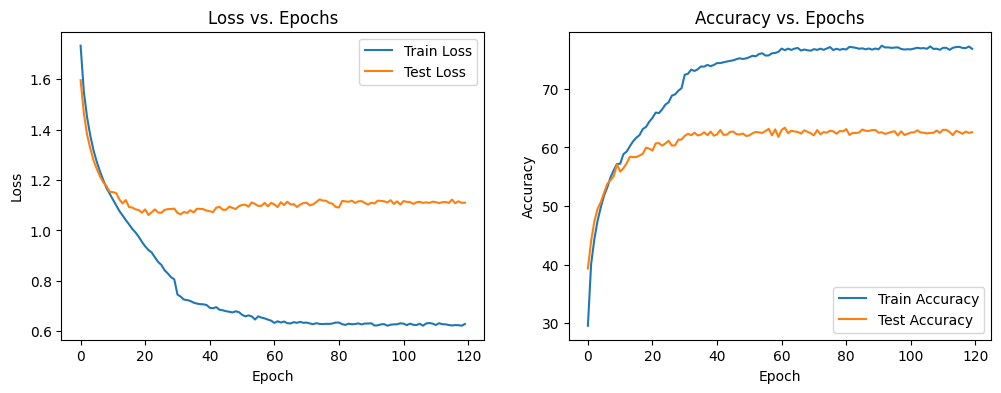

Model saved to shallow_cnn_emotion_model_120epochs.pth
CPU times: total: 3d 9h 1min 49s
Wall time: 15h 18min 9s


In [4]:
%%time
# Define the shallow CNN model class
class ShallowCNN(nn.Module):
    def __init__(self):
        super(ShallowCNN, self).__init__()
        
        # First convolutional layer: input channels = 1 (grayscale image), output channels = 32, kernel size = 3x3
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=0)
        
        # Second convolutional layer: input channels = 32, output channels = 64, kernel size = 3x3
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=0)
        
        # Third convolutional layer: input channels = 64, output channels = 128, kernel size = 3x3
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=0)
        
        # Fourth convolutional layer: input channels = 128, output channels = 256, kernel size = 3x3
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=0)
        
        # MaxPooling layer: kernel size = 2x2, stride = 2
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        
        # Fully connected layer: input features = 256 * 4 * 4, output features = 512
        self.fc1 = nn.Linear(256 * 4 * 4, 512)
        
        # Fully connected output layer: input features = 512, output features = 7 (number of classes)
        self.fc2 = nn.Linear(512, 7)
        
        # Dropout layer: dropout probability = 0.5
        self.dropout = nn.Dropout(p=0.5)
    
    # Define the forward pass
    def forward(self, x):
        # Apply first convolutional layer and ReLU activation
        x = F.relu(self.conv1(x))
        
        # Apply second convolutional layer and ReLU activation
        x = F.relu(self.conv2(x))
        
        # Apply max-pooling layer
        x = self.pool(x)
        
        # Apply third convolutional layer and ReLU activation
        x = F.relu(self.conv3(x))
        
        # Apply second max-pooling layer
        x = self.pool(x)
        
        # Apply fourth convolutional layer and ReLU activation
        x = F.relu(self.conv4(x))
        
        # Apply third max-pooling layer
        x = self.pool(x)
        
        # Flatten the tensor for the fully connected layer
        # Reshape the tensor to be fed into a fully connected layer
        # The -1 means PyTorch will infer the batch size automatically
        x = x.view(-1, 256 * 4 * 4)
        
        # Apply first fully connected layer and ReLU activation
        x = F.relu(self.fc1(x))
        
        # Apply dropout layer
        x = self.dropout(x)
        
        # Apply output fully connected layer
        x = self.fc2(x)
        
        return x

# Instantiate the model
model = ShallowCNN()

# Print the model architecture
print(model)

import torch.optim as optim  # Import the optim module from PyTorch for optimizers
from torch.optim.lr_scheduler import StepLR  # Import the learning rate scheduler

# Check if GPU is available and set the device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Instantiate the model and move it to the device
model = ShallowCNN().to(device)

# Define the loss function and the optimizer
criterion = nn.CrossEntropyLoss()  # Use CrossEntropyLoss for multi-class classification
optimizer = optim.Adam(model.parameters(), lr=1e-4)  # Adam optimizer with learning rate 1e-4

# Learning rate scheduler (optional)
scheduler = StepLR(optimizer, step_size=30, gamma=0.1)  # Reduce learning rate by a factor of 0.1 every 30 epochs

# Training loop
num_epochs = 120  # Number of epochs to train
train_losses = []  # List to store training losses
test_losses = []  # List to store test losses
train_accuracies = []  # List to store training accuracies
test_accuracies = []  # List to store test accuracies

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0  # Variable to track running loss
    correct = 0  # Variable to track correct predictions
    total = 0  # Variable to track total number of samples
    
    # Loop over the training data with progress bar
    with tqdm(total=len(train_loader), desc=f'Epoch {epoch + 1}/{num_epochs}', unit='batch') as pbar:
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)  # Move images and labels to the device
            
            optimizer.zero_grad()  # Zero the parameter gradients
            
            outputs = model(images)  # Forward pass
            
            loss = criterion(outputs, labels)  # Calculate the loss
            
            loss.backward()  # Backward pass
            optimizer.step()  # Update the weights
            
            running_loss += loss.item()  # Update running loss
            
            _, predicted = torch.max(outputs.data, 1)  # Get the predicted class
            total += labels.size(0)  # Update total number of samples
            correct += (predicted == labels).sum().item()  # Update correct predictions
            
            pbar.update(1)
            pbar.set_postfix(loss=loss.item(), acc=100 * correct / total)
    
    train_loss = running_loss / len(train_loader)  # Calculate average training loss
    train_accuracy = 100 * correct / total  # Calculate training accuracy
    train_losses.append(train_loss)  # Append training loss to the list
    train_accuracies.append(train_accuracy)  # Append training accuracy to the list
    
    model.eval()  # Set the model to evaluation mode
    test_loss = 0.0  # Variable to track test loss
    correct = 0  # Variable to track correct predictions
    total = 0  # Variable to track total number of samples
    
    with torch.no_grad():  # Disable gradient calculation for validation
        for images, labels in tqdm(test_loader, desc='Validating', unit='batch'):
            images, labels = images.to(device), labels.to(device)  # Move images and labels to the device
            
            outputs = model(images)  # Forward pass
            
            loss = criterion(outputs, labels)  # Calculate the loss
            test_loss += loss.item()  # Update test loss
            
            _, predicted = torch.max(outputs.data, 1)  # Get the predicted class
            total += labels.size(0)  # Update total number of samples
            correct += (predicted == labels).sum().item()  # Update correct predictions
    
    test_loss /= len(test_loader)  # Calculate average test loss
    test_accuracy = 100 * correct / total  # Calculate test accuracy
    test_losses.append(test_loss)  # Append test loss to the list
    test_accuracies.append(test_accuracy)  # Append test accuracy to the list
    
    scheduler.step()  # Step the learning rate scheduler
    
    print(f'Epoch [{epoch + 1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')

# Plotting training and validation loss and accuracy
plt.figure(figsize=(12, 4))  # Create a figure with a specific size
plt.subplot(1, 2, 1)  # Create a subplot (1 row, 2 columns, 1st subplot)
plt.plot(train_losses, label='Train Loss')  # Plot training losses
plt.plot(test_losses, label='Test Loss')  # Plot test losses
plt.xlabel('Epoch')  # Label for x-axis
plt.ylabel('Loss')  # Label for y-axis
plt.legend()  # Show legend
plt.title('Loss vs. Epochs')  # Title of the plot

plt.subplot(1, 2, 2)  # Create a subplot (1 row, 2 columns, 2nd subplot)
plt.plot(train_accuracies, label='Train Accuracy')  # Plot training accuracies
plt.plot(test_accuracies, label='Test Accuracy')  # Plot test accuracies
plt.xlabel('Epoch')  # Label for x-axis
plt.ylabel('Accuracy')  # Label for y-axis
plt.legend()  # Show legend
plt.title('Accuracy vs. Epochs')  # Title of the plot

plt.show()  # Show the plot

# Define the path where you want to save the model
model_save_path = "shallow_cnn_emotion_model_120epochs.pth"

# Save the model's state dictionary
torch.save(model.state_dict(), model_save_path)

print(f"Model saved to {model_save_path}")
